# Assignment 3

## Q1 Default Network

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

In [2]:
x_train = pd.read_csv('FashionMNISTwithaTwistW25/x_train.csv', header=None).values
x_test = pd.read_csv('FashionMNISTwithaTwistW25/x_test.csv', header=None).values
y_train = pd.read_csv('FashionMNISTwithaTwistW25/y_train.csv', header=None).values
y_test = pd.read_csv('FashionMNISTwithaTwistW25/y_test.csv', header=None).values

### Handling data

In [3]:
x_train_reshaped = x_train.reshape(-1 , 28, 28, 1).astype('float32') / 255.0
x_test_reshaped = x_test.reshape(-1 , 28, 28, 1).astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes=5)
y_test = keras.utils.to_categorical(y_test, num_classes=5)

### Building the CNN

In [4]:
def build_cnn():
	model = keras.Sequential([
		layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1), strides=1, padding='same', activation='relu'),
		layers.MaxPooling2D((2, 2)),
		layers.Conv2D(32, (3, 3), strides=1, padding='same', activation='relu'),
		layers.Flatten(),
		layers.Dense(512, activation='relu'),
		layers.Dense(5, activation='softmax')
	])

	model.compile(
		optimizer=keras.optimizers.SGD(),
		loss='categorical_crossentropy',
		metrics=['accuracy']	
	)

	return model

model = build_cnn()
model.summary()

c:\Users\peada\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,223,909 (12.30 MB)

 Trainable params: 3,223,909 (12.30 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [5]:

start_train = time.time()
trained_model_q1 = model.fit(x_train_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.2)
end_train = time.time()
print("Base Network Training time: {:.2f} seconds".format(end_train - start_train))

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.7730 - loss: 0.6092 - val_accuracy: 0.9342 - val_loss: 0.2098
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9421 - loss: 0.1799 - val_accuracy: 0.9521 - val_loss: 0.1583
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9543 - loss: 0.1495 - val_accuracy: 0.9596 - val_loss: 0.1278
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9598 - loss: 0.1261 - val_accuracy: 0.9613 - val_loss: 0.1216
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9636 - loss: 0.1155 - val_accuracy: 0.9653 - val_loss: 0.1133
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9676 - loss: 0.1062 - val_accuracy: 0.9681 - val_loss: 0.1074
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9683 - loss: 0.1028 - val_accuracy: 0.9681 - val_loss: 0.1066
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9700 - loss: 0.0972 - 

#### Training and Validation Accuracy vs Epochs

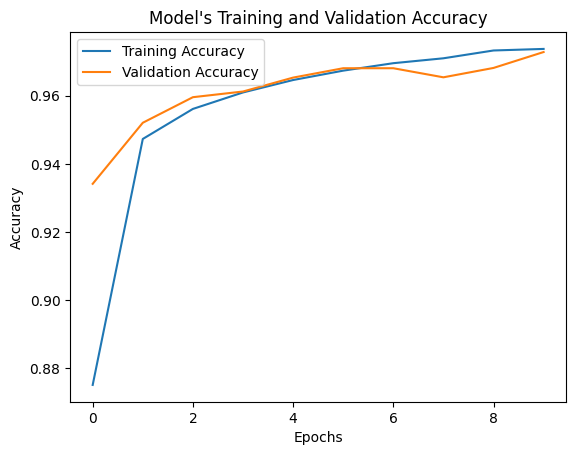

In [6]:
plt.plot(trained_model_q1.history['accuracy'], label='Training Accuracy')
plt.plot(trained_model_q1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model\'s Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Training and Validation Loss vs Epochs

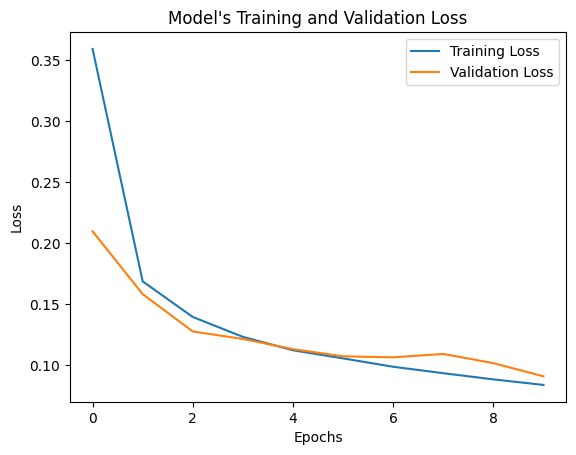

In [7]:
plt.plot(trained_model_q1.history['loss'], label='Training Loss')
plt.plot(trained_model_q1.history['val_loss'], label='Validation Loss')
plt.title('Model\'s Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Evaluation of model

In [8]:

start_test = time.time()
test_loss, test_acc = model.evaluate(x_test_reshaped, y_test)
end_test = time.time()
print("Base Network Test evaluation time: {:.2f} seconds".format(end_test - start_test))
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9727 - loss: 0.0992
Base Network Test evaluation time: 2.67 seconds
Test accuracy: 0.97130286693573


## Q2 Your Own Improvements

In [9]:
x_train_q2, x_val_q2, y_train_q2, y_val_q2 = train_test_split(x_train_reshaped, y_train, test_size=0.2, random_state=42)

In [10]:
data_augmentation = ImageDataGenerator(
	rotation_range=15,
	width_shift_range=0.15,
	height_shift_range=0.15,
	shear_range=0.1,
	zoom_range=0.2,
	horizontal_flip=True,
)
data_augmentation.fit(x_train_q2)

In [11]:
def build_improved_cnn():
	model = keras.Sequential([
		layers.Conv2D(64, (3, 3), input_shape=(28, 28, 1), strides=1, padding='same', activation='relu'),
		layers.BatchNormalization(),
		layers.MaxPooling2D((2, 2)),
		layers.Dropout(0.15),

		layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'),
		layers.BatchNormalization(),
		layers.MaxPooling2D((2, 2)),
		layers.Dropout(0.15),

		layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'),
		layers.BatchNormalization(),
		layers.MaxPooling2D((2, 2)),
		layers.Dropout(0.15),

		layers.Flatten(),
		layers.Dense(512, activation='relu'),
		layers.BatchNormalization(),
		layers.Dropout(0.25),
		layers.Dense(5, activation='softmax')
	])

	model.compile(
		optimizer=keras.optimizers.Adam(learning_rate=3e-4),
		loss='categorical_crossentropy',
		metrics=['accuracy']	
	)

	return model

improved_model = build_improved_cnn()
improved_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,556,229 (5.94 MB)

 Trainable params: 1,554,309 (5.93 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [12]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

start_train_q2 = time.time()
improved_model_q2 = improved_model.fit(
	data_augmentation.flow(x_train_q2, y_train_q2, batch_size=32),
	epochs=20,
	validation_data=(x_val_q2, y_val_q2),
	callbacks=[reduce_lr, early_stopping]
	)
end_train_q2 = time.time()
print("Improved Network Training time: {:.2f} seconds".format(end_train_q2 - start_train_q2))

Epoch 1/20


c:\Users\peada\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 98s 62ms/step - accuracy: 0.8444 - loss: 0.4784 - val_accuracy: 0.9565 - val_loss: 0.1329 - learning_rate: 3.0000e-04
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 98s 65ms/step - accuracy: 0.9361 - loss: 0.1917 - val_accuracy: 0.9730 - val_loss: 0.0820 - learning_rate: 3.0000e-04
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 97s 65ms/step - accuracy: 0.9518 - loss: 0.1464 - val_accuracy: 0.9736 - val_loss: 0.0850 - learning_rate: 3.0000e-04
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 77s 51ms/step - accuracy: 0.9578 - loss: 0.1287 - val_accuracy: 0.9734 - val_loss: 0.0800 - learning_rate: 3.0000e-04
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 67s 45ms/step - accuracy: 0.9615 - loss: 0.1174 - val_accuracy: 0.9721 - val_loss: 0.0830 - learning_rate: 3.0000e-04
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 68s 45ms/step - accuracy: 0.9649 - loss: 0.1070 - val_accuracy: 0.9748 - val_loss: 0.0739 - learning_rate: 3.0000e-04
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 67s 45ms/

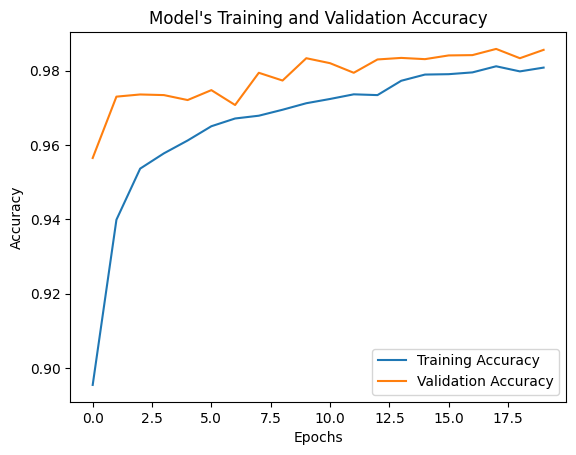

In [13]:
plt.plot(improved_model_q2.history['accuracy'], label='Training Accuracy')
plt.plot(improved_model_q2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model\'s Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

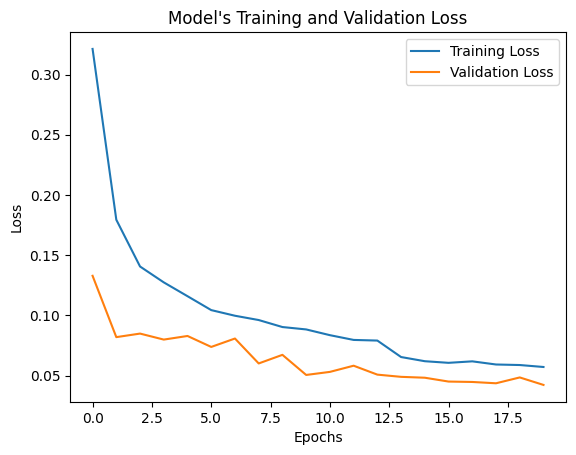

In [14]:
plt.plot(improved_model_q2.history['loss'], label='Training Loss')
plt.plot(improved_model_q2.history['val_loss'], label='Validation Loss')
plt.title('Model\'s Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:

start_test_q2 = time.time()
test_loss, test_acc = improved_model.evaluate(x_test_reshaped, y_test)
end_test_q2 = time.time()
print("Improved Network Test evaluation time: {:.2f} seconds".format(end_test_q2 - start_test_q2))
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9838 - loss: 0.0531
Improved Network Test evaluation time: 3.32 seconds
Test accuracy: 0.983501672744751


In [ ]:
# Replace 'improved_model' with the variable holding your trained model.
encoding_layer = improved_model.get_layer("flatten_5")
encoding_model = Model(inputs=improved_model.input, outputs=encoding_layer.output)
encoded_features = encoding_model.predict(x_test)
print("Encoded features shape:", encoded_features.shape)


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2)
pca_result = pca.fit_transform(encoded_features)

# Convert one-hot encoded y_test to label indices (if necessary)
y_test_labels = np.argmax(y_test, axis=1)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_test_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="True Label")
plt.title("PCA of Encoded Test Data (Color = True Label)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(encoded_features)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label="Cluster Label")
plt.title("PCA of Encoded Test Data (Color = K-means Cluster)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
